# Vector AutoRegression (VAR) Simulation
## Introduction

*Vector AutoRegression* (VAR) is a statistical model that captures the linear interdependencies among multiple time series. VAR models treat all variables in the system as endogenous, allowing for the analysis and forecasting of systems where variables mutually influence each other.

This approach is particularly useful for analyzing and forecasting systems where variables influence each other. In economics and finance, VAR models are commonly applied to study the dynamic impact of shocks in one variable on the entire system of variables. MIMIC, however, uses VAR models to simulate the dynamics of a microbiome system, where the abundances of different microbial species influence each other over time.

### VAR(1) Process

The `VARsim.py` script simulates data from a VAR(1) process, which is the simplest form of VAR model where each variable's current value is influenced by the immediately preceding values of all variables in the system. The general formula for a VAR(1) process with $ n $ variables is:

$$ X_t = A \cdot X_{t-1} + \epsilon_t $$

where:
- $ X_t $ is the vector of variables at time $ t $,
- $ A $ is the matrix of coefficients, capturing the influence of each variable's previous value on the current value of all variables in the system,
- $ \epsilon_t $ is the vector of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

In the script, `generate_var1_data` method is used to simulate data based on the VAR(1) model parameters:

- `n_obs`: Number of observations to generate.
- `coefficients`: Coefficient matrix for the VAR(1) process. It should be a square matrix of shape $ (n, n) $.
- `initial_values`: Initial values for the process, a vector of shape $ (n,) $.
- `noise_stddev`: Standard deviation of the noise term.

This method generates a time series data set following the specified VAR(1) process, allowing for the exploration of dynamic relationships among variables.

### Visualization Methods

The script includes functions for visualizing the simulated data, making it easier to analyze the interdependencies and dynamics within the system. These visualization methods include plotting the time series of each variable and creating heatmaps of the coefficients to understand the influence of variables on each other.

## Notebook Structure

This notebook will show how to simulate VAR models using the `VARsim.py` script, including specifying parameters directly in the code and importing from a JSON file. We will also explore various methods for visualizing the simulated data to derive insights into the modeled system's dynamics.

## Objective
The goal is to simulate VAR model dynamics using the `VARsim.py` class, visualize the simulated data, and understand the interactions within the VAR model. We aim to gain insights into the system's dynamics through simulation and visualization techniques.


### Importing Libraries

In [1]:
import sys
sys.path.append("../../")

In [16]:
from mimic.model_simulate.VAR_sim import *

### Running the Simulation with Specified Parameters
In this section, we'll demonstrate how to run a VAR simulation using specified parameters directly in the code. This approach provides a quick and flexible way to test different configurations.

In [17]:
# Specify the simulation parameters directly

# Number of observations to simulate. In this example we simulate 100 observations.
n_obs = 100

# Coefficients for the VAR model represented as a matrix. In this example, the VAR model has 2 lags and 2 variables.
coefficients = [[0.8, -0.2], [0.3, 0.5]]

# Initial values for the VAR model, represented as a matrix. In this example, the VAR model has 2 variables so the initial values are a 2x1 matrix.
initial_values = [[1], [2]]

# Standard deviation of the noise term in the VAR model. In this example, the noise term has a standard deviation of 1.
noise_stddev = 1.0

# Determines how the output should be handled. If 'show', the output is printed to the console. If 'save', the output is saved to a file. If 'none', the output is not printed or saved. If 'both', the output is printed and saved.
output = 'show'

In [18]:
# Create the VAR model. The VAR model is created by calling the VARSimulator class and passing the simulation parameters as arguments.
simulator = VARSimulator(
    n_obs, coefficients, initial_values, noise_stddev, output)

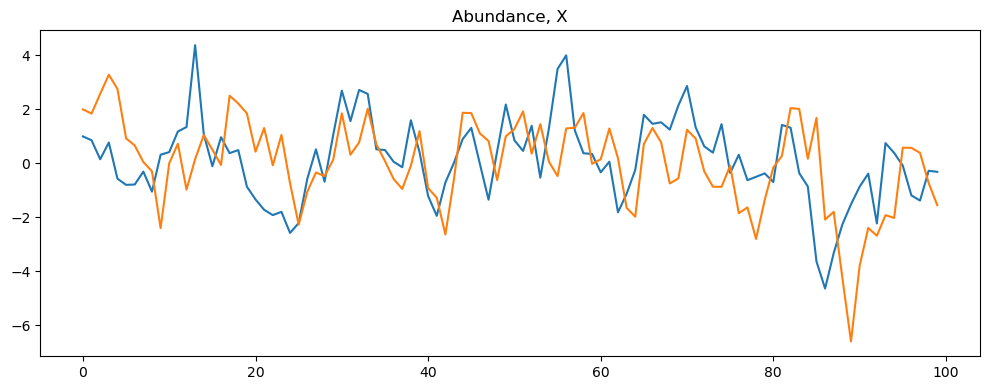

In [19]:
# Simulate the data. The data is simulated by calling the run method of the VARSimulator object and passing the name of the simulation method as an argument. In this example, the simulation method is 'VARsim'.
simulator.simulate("VARsim")

In [20]:
# The simulated data is stored in the VARSimulator object and can be accessed using the data attribute.
simulated_data = simulator.data
print(simulated_data)

[[ 1.          2.        ]
 [ 0.85542645  1.84610004]
 [ 0.15389283  2.57901518]
 [ 0.77365175  3.28387357]
 [-0.56505426  2.75663195]
 [-0.794169    0.92744571]
 [-0.78197263  0.66432168]
 [-0.30407019  0.05346526]
 [-1.04540277 -0.29317229]
 [ 0.32186102 -2.39649821]
 [ 0.41938752  0.0073098 ]
 [ 1.18180286  0.72830297]
 [ 1.34704108 -0.96915116]
 [ 4.37946542  0.15662184]
 [ 1.08453737  1.04906211]
 [-0.10394109  0.50831624]
 [ 0.97008006 -0.05676702]
 [ 0.38048549  2.50493957]
 [ 0.49329243  2.21755178]
 [-0.86167959  1.85099356]
 [-1.33495669  0.43480095]
 [-1.71913369  1.31012775]
 [-1.91417315 -0.07096627]
 [-1.79391087  1.05311259]
 [-2.57475422 -0.73461999]
 [-2.20876738 -2.26689679]
 [-0.56891894 -1.04687014]
 [ 0.51999804 -0.33582473]
 [-0.67720806 -0.47137456]
 [ 1.05492484  0.13644332]
 [ 2.69529771  1.85715317]
 [ 1.56756746  0.32196137]
 [ 2.72086064  0.77539232]
 [ 2.57358682  2.02239243]
 [ 0.52029883  0.70389736]
 [ 0.49654777  0.08751404]
 [ 0.06242246 -0.57745053]
 

In [21]:
# You can also access the simulation parameters using the print_params method of the VARSimulator object.
simulator.print_parameters()

n_obs: 100
coefficients: [[ 0.8 -0.2]
 [ 0.3  0.5]]
initial_values: [[1]
 [2]]
noise_stddev: 1.0
output: show
data: [[ 1.          2.        ]
 [ 0.85542645  1.84610004]
 [ 0.15389283  2.57901518]
 [ 0.77365175  3.28387357]
 [-0.56505426  2.75663195]
 [-0.794169    0.92744571]
 [-0.78197263  0.66432168]
 [-0.30407019  0.05346526]
 [-1.04540277 -0.29317229]
 [ 0.32186102 -2.39649821]
 [ 0.41938752  0.0073098 ]
 [ 1.18180286  0.72830297]
 [ 1.34704108 -0.96915116]
 [ 4.37946542  0.15662184]
 [ 1.08453737  1.04906211]
 [-0.10394109  0.50831624]
 [ 0.97008006 -0.05676702]
 [ 0.38048549  2.50493957]
 [ 0.49329243  2.21755178]
 [-0.86167959  1.85099356]
 [-1.33495669  0.43480095]
 [-1.71913369  1.31012775]
 [-1.91417315 -0.07096627]
 [-1.79391087  1.05311259]
 [-2.57475422 -0.73461999]
 [-2.20876738 -2.26689679]
 [-0.56891894 -1.04687014]
 [ 0.51999804 -0.33582473]
 [-0.67720806 -0.47137456]
 [ 1.05492484  0.13644332]
 [ 2.69529771  1.85715317]
 [ 1.56756746  0.32196137]
 [ 2.72086064  0.775

In [22]:
# The simulated data can be saved to a file by calling the save method of the VARSimulator object and passing the name of the file as an argument. In this example, the file is saved as 'simulated_data.csv'.
simulator.save_data("simulated_data.csv")

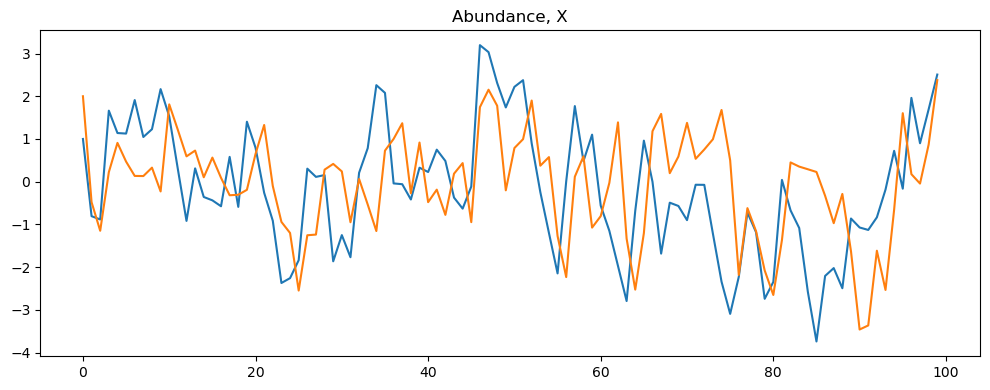

n_obs: 100
coefficients: [[ 0.8 -0.2]
 [ 0.3  0.5]]
initial_values: [[1]
 [2]]
noise_stddev: 1.0
output: show
data: [[ 1.00000000e+00  2.00000000e+00]
 [-8.07682200e-01 -4.79495671e-01]
 [-8.84857746e-01 -1.14946863e+00]
 [ 1.66274458e+00  2.22643621e-01]
 [ 1.13887432e+00  9.08098452e-01]
 [ 1.12608845e+00  4.69888390e-01]
 [ 1.91086457e+00  1.34700405e-01]
 [ 1.04612685e+00  1.31527171e-01]
 [ 1.22809008e+00  3.28413556e-01]
 [ 2.16668499e+00 -2.28860376e-01]
 [ 1.52899811e+00  1.80957813e+00]
 [ 2.92350955e-01  1.21108832e+00]
 [-9.18174433e-01  5.92823277e-01]
 [ 3.11681664e-01  7.28155718e-01]
 [-3.58218636e-01  1.03160205e-01]
 [-4.37246499e-01  5.63659062e-01]
 [-5.75501579e-01  9.07494786e-02]
 [ 5.80983663e-01 -3.17998785e-01]
 [-5.89855318e-01 -3.06449828e-01]
 [ 1.40374399e+00 -1.90738572e-01]
 [ 7.94322214e-01  6.48642543e-01]
 [-2.60762821e-01  1.32739699e+00]
 [-9.15263918e-01 -1.01688707e-01]
 [-2.37206231e+00 -9.41832028e-01]
 [-2.25829335e+00 -1.20112001e+00]
 [-1.8381

In [23]:
# If no coefficients are specified, the default values are used
# for example, in this example the noise is not specified


simulator = VARSimulator(n_obs=n_obs, initial_values=[[1], [2]], output='show')


simulator.simulate("VARsim")


simulator.print_parameters()

The simulator can also be run using parameters saved in a json file, which is useful for managing and reusing configurations, especially if the matrices are big. We'll demonstrate this approach in the next section.

For example, you could specify the parameters in the following way:

```JSON
{
    "n_obs": 97,
    "coefficients": [
        [
            0.8,
            -0.2,
            0.3
        ],
        [
            0.3,
            0.5,
            -1.0
        ],
        [
            0.2,
            -0.1,
            0.4
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ],
        [
            0
        ]
    ],
    "noise_stddev": 1.2,
    "output": "both"
}
```

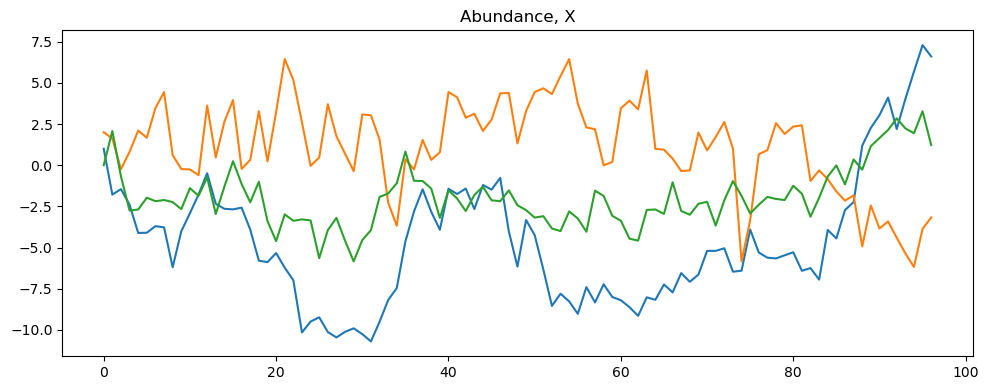

In [24]:
parameters = read_parameters('parameters2.json')
simulator = VARSimulator(**parameters)
simulator.simulate("VARsim")

The script also contains different methods for visualizing the simulated data, including plotting the time series of each variable and creating heatmaps of the coefficients to understand the influence of variables on each other.

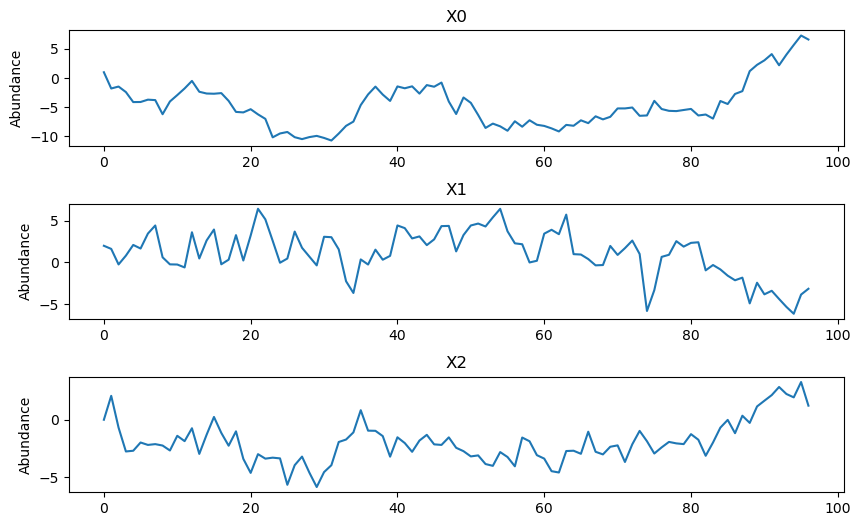

In [25]:
simulator.make_plot(simulator.data)